# Aprendizado Supervisionado



O objetivo deste laboratório é aplicar na base do titanic as etapas de prepação de dados apresentadas em sala de aula. Ao final apresente uma base de dados adequada para um modelo de classificação. Com a base pronta para o modelo vamos aplicar algumas modelos de aprendizado supervisionado para classifica os dados.

In [2]:
# Imports necessário

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn import preprocessing



## Dataset

Vamos trabalhar novamente com a base do Titanic. A bose pode ser baixada na página do desafio do Titanic no Kaggle: https://www.kaggle.com/c/titanic

![](https://media.giphy.com/media/XOY5y7YXjTD7q/giphy.gif?cid=ecf05e47kfxmcx3vp300zcgdbteywwruog1dvtie391tk8mw&rid=giphy.gif&ct=g)



In [3]:
titanic_dataset = pd.read_csv("../datasets/TitanicDataset.csv")
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Descrição das Tarefas

1. Eliminar os atributos manualmente
2. Verificar se os dados estão desbalanceados
3. Analisar dados ausentes
4. Verificar dados incosistentes, redundantes e com ruído.
5. Fazer as transformações dos dados, se necessário.

## Execução das Tarefas



### Eliminar os atributos manualmente

A primeira coisa que pode ser feita é a eliminação de atributos manualmente. De cara, atributos como _PassengerId_, _Name_ e _Ticket_ não trazem informações relevantes para o processo de classificação. Desta forma podemos remove-los.

In [4]:
# Eliminando as colunas 
titanic_dataset = titanic_dataset.drop(columns=['PassengerId',"Name", "Ticket"])
titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Verificar se os dados estão desbalanceados

Removido os atributos podemos verificar a distribuição de classes para saber se os dados estão desbalanceados.

<AxesSubplot:>

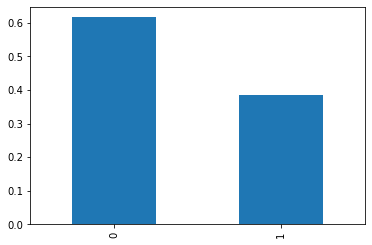

In [5]:
titanic_dataset['Survived'].value_counts(normalize=True).plot(kind='bar')


A proporção é de mais ou menos de 60% para a classe não sobreviveu e 40% para sobreviveu. Apesar de um desbalanceamento, nada muito crítico para os algoritmos de classificação.


### Analisar dados ausentes

Uma outra análise que se pode fazer é em relação aos dados incompletos. Para isto, vamos usar a função count para indicar quantos dados tem cada atributo.

In [6]:
count_ = titanic_dataset.count()
count_

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Cabin       204
Embarked    889
dtype: int64

**O que podemos fazer com cada um dos atributos?**

**Cabin:** nesse caso podemos remover o atributo _Cabin_ que refere-se a cabine em que o passageiro estava. Talvez se conseguíssemos relacionar a cabine com a posição dentro do navio, poderíamos ter algum tipo de informação. Mas dada a quantidade de dados válidos e a não relevância do atributo, podemos excluí-lo. 

**Age:** Remover este atributo é mais complicado. A idade é uma informação relevante para o processo de classificação. Remover os dados faria com que eliminássemos quase 200 instâncias, aproximadamente 20% da base. Nesse caso a gente deve pensar em outra abordagem. 

A documentação do pandas possui [um artigo](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) falando somente sobre dados ausentes. É possível identificar e aplicar algumas métricas de substituição de valores. 

Vamos usar o método de substituir os valores ausentes pela média da coluna. Essa é uma abordagem muito simples. Poderíamos utilizar algo mais elaborado. Fica como exercício a parte. 


In [7]:
# Removendo a columa Cabin

titanic_dataset = titanic_dataset.drop(columns=['Cabin'])
titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
# Substituindo os valores ausentes pela média da coluna 

titanic_dataset['Age'] = titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean())

In [9]:
#Veritificando o quantitativo
count_ = titanic_dataset.count()
count_

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

### Verificar dados incosistentes, redundantes e com ruído.

O passo seguinte é fazer a análise em cima de dados incosistentes, ruídos e redundantes. 

O pandas já possui um método que permite eliminar dados duplicados. No entanto, se aplicarmos ele a esta base, pode ser que muitos dados iguais mas não necessariamente é um problema de duplicidade. Como removemos todos os dados que de alguma forma identificava o passageiro, a duplicidade pode ser de fato por conta de um padrão que é comum na base. Sendo assim, vamos carregar temporariamente a base original e fazer a verificação de duplicidade nesta.



In [10]:
dataframe_temp = pd.read_csv("../datasets/TitanicDataset.csv")
duplicated_rows = dataframe_temp[dataframe_temp.duplicated(keep='last')]
duplicated_rows.shape

(0, 12)

Observe que os dados originais não possuem instâncias duplicadas. 

A base pode apresentar redudância de atributos a nível de atributos. Pelo contexto do atributos, não foram identificadas redudâncias. 

Podemos olhar a partir da correlação dos atributos, usando a matriz de correlação extraída no último laboratório, temos:

<AxesSubplot:>

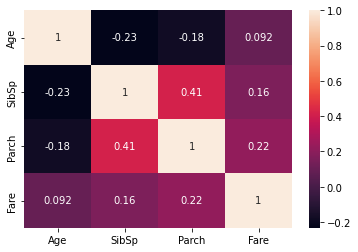

In [11]:
titanic_corr = titanic_dataset[['Age','SibSp','Parch', 'Fare']].corr()
sns.heatmap(titanic_corr, xticklabels=titanic_corr.columns, yticklabels=titanic_corr.columns, annot=True)

Nenhum atributo numérico tem uma correlação muito forte. Sendo assim, não vamos remover nenhum atributo. 

Em relação a dados inconsistentes e ruído, podemos analisar brevemente o boxplot dos atributos. Se analisarmos estes gráficos, podemos ver alguns outliers, principalmente nos atributos _Age_ e _Fare_.

<AxesSubplot:xlabel='Age'>

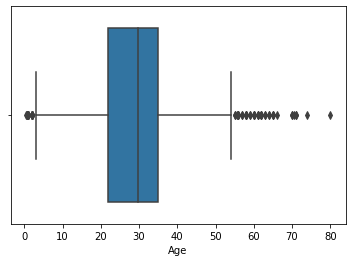

In [12]:
sns.boxplot(x=titanic_dataset['Age'])

<AxesSubplot:xlabel='Fare'>

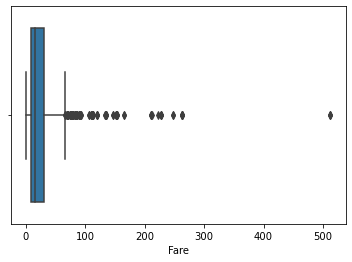

In [37]:
sns.boxplot(x=titanic_dataset['Fare'])

Uma ação que podemos tomar com esses valores é sua remoção da base de dados. No entanto, vamos deixar para fazer isso quando estivermos trabalhando com os modelos de Machine Learnig. Só assim saberemos se a retirada dessas instâncias implicará em algum projuízo para o processo de aprendizagem. 

### Fazer as transformações dos dados, se necessário.

Para finalizar essa primeira parte de Preparação dos Dados, precisamos fazer as transformações de dados necessárias. Como vimos no guia de estudo, podemos transformar dados numéricos em categóricos ou vice-versa. Além disso, podemos trabalhar com a escala e o intervalo dos dados. 

Vamos analisar a base de dados resultante dos processo anteriores. 

In [13]:
titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Quais alterações podemos fazer nos dados?**

* Os campos _Sex_ e _Embarked_ são categóricos e podems ser transformados em dados numéricos. No entanto, nenhum dos dois tem relação de ordem, logo devemos criar atributos novos para representar essa informação;
* O Campo _PClass_ também é um campo categórico. No entanto, não vamos precisar fazer a transformação anterior porque existe uma relação de ordem em sua informação;
* A escala do campo _Fare_ é muito grande se comparada com os demais dados. Logo, podemos normalizar os valores para reduzir essa diferença;
* O atributo _Survived_ é categórico mas ele será nossa atributo alvo. Vamos manter dessa forma para que seja utilizado de forma adequado nos modelos de classificação. 
* O campo _Age_ pode ser transformado discretizado e transformado em um atributo qualitativo. Lembre-se que algoritmos de classificação trabalham melhor com esse tipo de atributo. 

Vamos usar o pandas para aplicar essas transformações nos dados. 

_Transformando os campos `Sex` e `Embarked`_


Para isso vamos utilizar a função *get_dummie* do pandas. Essa função pega os valores categóricos e transformam em colunas. 

In [14]:
titanic_dataset = pd.get_dummies(titanic_dataset, columns=["Sex","Embarked"])

In [15]:
titanic_dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


Um bom guia sobre transformação de atributos categóricos com pandas pode ser encontrado [neste link](https://pbpython.com/categorical-encoding.html)

_Normalizando o campo `Fare`_ 


Vamos utilizar o pacote _preprocessing_ do scikit-learn para essa tarefa. 

In [16]:
# O primeiro passo é converter a coluna que será normalizada para float. 
# Para verificar os tipos das colunas use: titanic_dataset.dtypes 

float_array = titanic_dataset['Fare'].values

In [17]:
# O segundo passo é criar o objeto min/max do preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array[:, np.newaxis])

In [18]:
# O terceiro passo é substituir os valores na base

titanic_dataset['Fare'] = scaled_array

In [19]:
titanic_dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0.014151,0,1,0,0,1
1,1,1,38.0,1,0,0.139136,1,0,1,0,0
2,1,3,26.0,0,0,0.015469,1,0,0,0,1
3,1,1,35.0,1,0,0.103644,1,0,0,0,1
4,0,3,35.0,0,0,0.015713,0,1,0,0,1


O passo seguinte é transformar o campo quantitativo de idade em qualitativo.

Um dois métodos que permitem fazer isso é _cut_ do pandas. Detalhes deste método pode ser encontrado [neste link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html). 

Vamos usar a seguinte classificação de idades: Criança (0-12 anos), adolescente (13-18 anos), adulto (19-59 anos) and idoso (acima de 60 anos).

Estou usando os parâmetros _bins_, _labels_ e _right_ do método _cut_. O primeiro diz o intervalo em que a discretização será feita. O segundo indica o label associado a cada intervalo e o terceiro indica que o lado direito vai ser aberto e o esquerdo fechado. Sendo assim, temos os seguintes intervalos: 

* **[0, 13)**  $0 \leq x < 13$ **(criança)**
* **[13, 19):** $13 \leq x < 19$ **(adolescente)**
* **[19, 60):** $ 19 \leq x < 60$ **(adulto)**
* **[60, infinito):** $ x \geq 60$ **(idoso)**


In [20]:
titanic_dataset['Age'] = pd.cut(titanic_dataset['Age'],bins=[0,13,19,60,float("inf")],right=False,labels=['criança','adolescente','adulto','idoso'])

In [21]:
titanic_dataset.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,adulto,1,0,0.014151,0,1,0,0,1
1,1,1,adulto,1,0,0.139136,1,0,1,0,0
2,1,3,adulto,0,0,0.015469,1,0,0,0,1
3,1,1,adulto,1,0,0.103644,1,0,0,0,1
4,0,3,adulto,0,0,0.015713,0,1,0,0,1
5,0,3,adulto,0,0,0.016510,0,1,0,1,0
6,0,1,adulto,0,0,0.101229,0,1,0,0,1
7,0,3,criança,3,1,0.041136,0,1,0,0,1
8,1,3,adulto,0,2,0.021731,1,0,0,0,1
9,1,2,adolescente,1,0,0.058694,1,0,1,0,0


Como transformamos a coluna **Age** em qualitativo, devemos transformar agora em valores. Como não existe um grau de importância entre as idades, vamos utilizar o método _dummie_ usado anteriormente. 

In [22]:
titanic_dataset = pd.get_dummies(titanic_dataset, columns=["Age"])

In [23]:
titanic_dataset.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_criança,Age_adolescente,Age_adulto,Age_idoso
0,0,3,1,0,0.014151,0,1,0,0,1,0,0,1,0
1,1,1,1,0,0.139136,1,0,1,0,0,0,0,1,0
2,1,3,0,0,0.015469,1,0,0,0,1,0,0,1,0
3,1,1,1,0,0.103644,1,0,0,0,1,0,0,1,0
4,0,3,0,0,0.015713,0,1,0,0,1,0,0,1,0


## Modelos de Classificação

Agora que o dataset está no formato correto, vamos trabalhar alguns modelos de classificação. No código a seguir iremos trabalhar com 3 modelos: KNN (classe `KNeighborsClassifier`), a Árvore de Decisão (classe `DecisionTreeClassifier`) e o SVM (classe `SVC`).

Nessa etapa, queremos apenas executar os modelos e ver os valores para a acurácia do modelo treinado.

In [27]:
# Importação dos modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Importação para divisão da base
from sklearn.model_selection import train_test_split

import math 

Antes de prosseguir com as etapas de treinamento, vamos serparar nossa base em X (atributos) e y (classe).

In [25]:
X = titanic_dataset[titanic_dataset.columns[1:]]
y = titanic_dataset['Survived']

### Separando treino e teste

Como falamos em sala de aula, devemos separar treino e teste. O modelo deve ser treinado na base de treino e avaliado a partir do resultado da base de teste. Não devemos treinar e testar na mesma base. 

Para isso, vamos utilizar o método `train_test_split` do pacote `sklearn.model_selection`. 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Vamos treinar um modelo KNN variando o valor de K (número de vizinhos) e escolher modelo com o maior valor de K. 

In [35]:
# KNN

melhor_acc = -math.inf

for n in range(1, 8):
    model_knn = KNeighborsClassifier(n_neighbors=n)
    model_knn.fit(X_train, y_train)
    acc = model_knn.score(X_test, y_test)
    if acc > melhor_acc:
        melhor_acc = acc
        melhor_k = n

    print("KNN com k = %i: %f" % (n, acc))

print("---------")
print("O melhor valor de K foi %i com acurácia de %.2f" % (melhor_k, melhor_acc))

KNN com k = 1: 0.762712
KNN com k = 2: 0.796610
KNN com k = 3: 0.800000
KNN com k = 4: 0.806780
KNN com k = 5: 0.833898
KNN com k = 6: 0.827119
KNN com k = 7: 0.820339
---------
O melhor valor de K foi 5 com acurácia de 0.83


Podemos testar diferentes modelos e olhar o valor do Score para compará-los. 

In [36]:
# Treinando um modelo de Árvore de Decisão

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
acc_dtree = model_tree.score(X_test, y_test)

print("Acurácia para o modelo de árvore de Decisão: %.2f" % acc_dtree)

Acurácia para o mode de árvore de Decisão: 0.79


In [37]:
## Treinando um SVM 

model_svc = SVC()
model_svc.fit(X_train, y_train)
acc_svm = model_svc.score(X_test, y_test)

print("Acurácia para o modelo SVM: %.2f" % acc_svm)

Acurácia para o modelo SVM: 0.84


## Validação Cruzada 

Essa forma de treinar separando somente uma vez a base de dados podem levar a resultados que sejam influenciados pela divisão da base. O ideal é que a gente faça várias divisões na base e teste para cada uma dessas vez. Isso é chamado de validação cruzada e pode ser feita no scikit-learn com o método `cross_validade`.

In [40]:
# Importando o método de Validação Cruzada. 

from sklearn.model_selection import cross_validate

Vamos fazer a validação cruzada, passando o SVM como modelo. Veja que antes precisamos instanciar os modelos com os parâmetro que a gente quer. Nesse caso, estamos usando os parâmetros padrão. 

In [41]:
model_svc = SVC()

# Nesse caso, passamos o X e y. O cross_validade vai fazer a separação de treino e teste. 
val_score = cross_validate(model_svc, X, y, cv=5)
val_score

{'fit_time': array([0.04286909, 0.02834415, 0.02894783, 0.02301598, 0.02709794]),
 'score_time': array([0.01970983, 0.01768398, 0.01718116, 0.01473713, 0.01293588]),
 'test_score': array([0.83798883, 0.8258427 , 0.8258427 , 0.80337079, 0.85393258])}

O método retorna um dicionário com 3 informações: 

* `fit_time`: o tempo de treinamento. 
* `score_time`: o tempo de teste. 
* `test_score`: os valores do teste (neste caso, acurácia).

Vamos imprimir a média de cada uma dessas variáveis. 

In [43]:
print("Tempo de treinamento médio:  %.3f" % val_score['fit_time'].mean())
print("Tempo de teste médio: %.3f" % val_score['score_time'].mean())
print("Valor de acurácia: %.3f" % val_score['test_score'].mean()) 

Tempo de treinamento médio:  0.030
Tempo de teste médio: 0.016
Valor de acurácia: 0.829


É isso. Experimente testar diferentes modelos de Classificação e compare :) 